In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import os
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import random

In [7]:
import nltk
nltk.download('punkt')
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Reading every Sherlock Holmes adventure!

In [5]:
story_path = "/content/gdrive/MyDrive/Colab Notebooks/sherlock/"

def read_all_stories(story_path):
    txt = []
    for _, _, files in os.walk(story_path):
        for file in files:
            with open(story_path+file) as f:
                for line in f:
                    line = line.strip()
                    if line=='----------': break
                    if line!='':txt.append(line)
    return txt
        
stories = read_all_stories(story_path)
print("number of lines = ", len(stories))

number of lines =  430042


Cleaning the text

In [8]:
def clean_txt(txt):
    cleaned_txt = []
    for line in txt:
        line = line.lower()
        line = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-\\]", "", line)
        tokens = word_tokenize(line)
        words = [word for word in tokens if word.isalpha()]
        cleaned_txt+=words
    return cleaned_txt

cleaned_stories = clean_txt(stories)
print("number of words = ", len(cleaned_stories))

number of words =  4664494


Creating the Markov Model

In [9]:
def make_markov_model(cleaned_stories, n_gram=2):
    markov_model = {}
    for i in range(len(cleaned_stories)-n_gram-1):
        curr_state, next_state = "", ""
        for j in range(n_gram):
            curr_state += cleaned_stories[i+j] + " "
            next_state += cleaned_stories[i+j+n_gram] + " "
        curr_state = curr_state[:-1]
        next_state = next_state[:-1]
        if curr_state not in markov_model:
            markov_model[curr_state] = {}
            markov_model[curr_state][next_state] = 1
        else:
            if next_state in markov_model[curr_state]:
                markov_model[curr_state][next_state] += 1
            else:
                markov_model[curr_state][next_state] = 1
    
    # calculating transition probabilities
    for curr_state, transition in markov_model.items():
        total = sum(transition.values())
        for state, count in transition.items():
            markov_model[curr_state][state] = count/total
        
    return markov_model

In [10]:
markov_model = make_markov_model(cleaned_stories)

In [11]:
print("number of states = ", len(markov_model.keys()))

number of states =  208719


In [12]:
print("All possible transitions from 'the game' state: \n")
print(markov_model['the game'])

All possible transitions from 'the game' state: 

{'for all': 0.06306306306306306, 'was afoot': 0.036036036036036036, 'my own': 0.02702702702702703, 'at any': 0.02702702702702703, 'mr holmes': 0.02702702702702703, 'ay whats': 0.02702702702702703, 'my friend': 0.02702702702702703, 'fairly by': 0.02702702702702703, 'is not': 0.02702702702702703, 'was not': 0.02702702702702703, 'was in': 0.02702702702702703, 'would have': 0.036036036036036036, 'for the': 0.036036036036036036, 'worth it': 0.02702702702702703, 'you are': 0.02702702702702703, 'was whist': 0.036036036036036036, 'was up': 0.09009009009009009, 'in that': 0.036036036036036036, 'the lack': 0.036036036036036036, 'is afoot': 0.036036036036036036, 'is hardly': 0.02702702702702703, 'is up': 0.06306306306306306, 'is and': 0.036036036036036036, 'in their': 0.036036036036036036, 'may wander': 0.02702702702702703, 'now a': 0.02702702702702703, 'i am': 0.02702702702702703, 'now count': 0.02702702702702703, 'your letter': 0.027027027027027

Generating Sherlock Holmes stories!

In [13]:
def generate_story(markov_model, limit=100, start='my god'):
    n = 0
    curr_state = start
    next_state = None
    story = ""
    story+=curr_state+" "
    while n<limit:
        next_state = random.choices(list(markov_model[curr_state].keys()),
                                    list(markov_model[curr_state].values()))
        
        curr_state = next_state[0]
        story+=curr_state+" "
        n+=1
    return story

In [14]:
for i in range(20):
    print(str(i)+". ", generate_story(markov_model, start="dear holmes", limit=8))

0.  dear holmes am i he gazed from sir charles hardy memorandum from belgrade note on the bed it 
1.  dear holmes i ejaculated oh there can be indicated by his remarks it was well that the owner 
2.  dear holmes oh yes all of you were starving in the desert beneath it there lay a sheet 
3.  dear holmes that i was pledged to him and have a look at these scattered houses and you 
4.  dear holmes if i could catch glimpses of the river and the name of the steamer norah creina 
5.  dear holmes oh yes no doubt devoted mr mason shuffled uncomfortably shes devoted enough he answered then what 
6.  dear holmes i fear that the household of wisteria lodge between esher and oxshott yesterday evening a telegram 
7.  dear holmes i exclaimed i could not clearly see his features you have come on a pinnacle in 
8.  dear holmes what do you mean holmes glanced over them trying to express it as delicately as i 
9.  dear holmes am i sir he answered with a flush stole over to the amount and the time 
10.  d

In [15]:
for i in range(20):
    print(str(i)+". ", generate_story(markov_model, start="my dear", limit=8))

0.  my dear watson remember that i was certain there was no sign could we conceive of no explanation 
1.  my dear watson i am perfectly satisfied at the same so it was arranged resisting stapletons offer of 
2.  my dear watson and i have been off for some time at the finally he handed it back 
3.  my dear wife died young she is this i cried locking the door and there is no other 
4.  my dear son the son as far as i know that every carriage has been carefully examined i 
5.  my dear watson to think that i need not say what it was he waiting for a gentleman 
6.  my dear young lady cried holmes clapping the inspector on handling so distinctive and these words a shudder 
7.  my dear mr holmes why ah thats the house all alone at his own account he was telling 
8.  my dear little alice even when the invalid i was surprised to hear that i am sure i 
9.  my dear watson this knife is surely in your line than in that of your friend how the 
10.  my dear watson but indeed if i had to walk home to

In [16]:
for i in range(20):
    print(str(i)+". ", generate_story(markov_model, start="i would", limit=8))

0.  i would care if it was during this time it is nearly fifty years of official life i 
1.  i would willingly do so but i am the unhappy maid where she had borne trouble with a 
2.  i would lay a miry path holmes gave me a curiously questioning glance which she turned and had 
3.  i would give one thought to speak with them in its clutches its a blessed mystery to me 
4.  i would not miss harrison here for example is one very singular one though he appears to know 
5.  i would have told you much his only son and know how far sherlock holmes took the book 
6.  i would rather die under my friends nose holmes examined it for the metal work was mostly to 
7.  i would i could see as far as to go out alone my friend with a sigh of 
8.  i would not do so could effect an arrest until night at godolphin street westminster our readers will 
9.  i would take it what do you intend to do with me to restore the glories of the 
10.  i would be after her now it was a desperate fellow like this nottin

In [17]:
print(generate_story(markov_model, start="the case", limit=100))

the case after all two columns were occupied with a considerable garden which was an inconceivable hypothesis or else we must push on watson we strode off together with the copper beeches by seven oclock my friend and colleague dr watson draw up a little slip the end of the old days in victoria ha in victoria that is important yes at the mines would not herself stay in the cab in a side door my comrade rushed to the company once more subsided into a roar of rage at the sight of him while we all peered eagerly over his shoulders i dont fear them or their most extraordinary case he had when he liked in it for an instant to look at it in the daytime then creeping up to monday night declares that he had taken refuge there the matter dropped i turn over the pages lazily leaning back in his bed i told her that i can do is to clear up before i have finished our breakfast one morning at a private hotel in craven street which is a cheetah and a baboon and what did they not instantly give the id

In [30]:
print(generate_story(markov_model, start="the case", limit=100))

the case it will too remarked holmes very thoughtful and worried once i pressed him about it as i drove to the point this pistol that was found the charred bones all the mystery it was i gave him credit for has master joseph he flew at me until the race was over when i went down to see what you can answer with more authority than anyone else yes tell shinwell johnson to get that girl out of the latter as a reply he made was of a dun colour which lends itself very well this has always been a woman had entered with us so as to throw in all innocence as heaven is my judge when he was a devoted creature who had arranged the mirror was so placed that seated in the lonely wood of beauchamp arriance here amid his improvisations and his editions then it comes to me is that i was ready i was right to me i have been or how could the coffin mean and for a moment over mcmurdos face but it was as well to start we must explore the matter of the very hours when the powers which you have given 


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from wordcloud import WordCloud,STOPWORDS
from PIL import Image

In [ ]:
story_path = "/content/gdrive/MyDrive/Colab Notebooks/sherlock/"

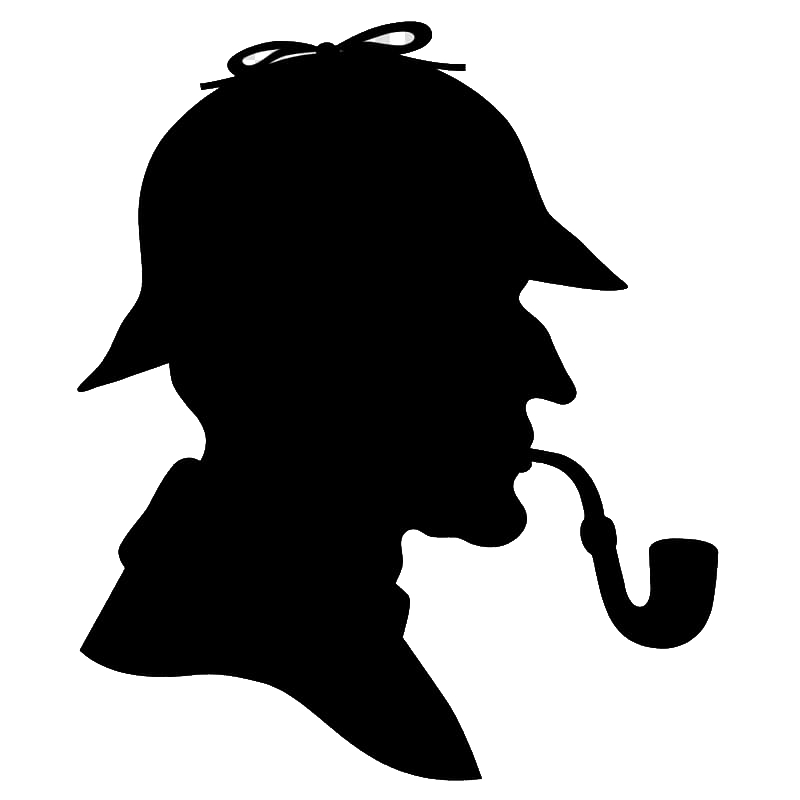

In [19]:
Image.open('/content/gdrive/MyDrive/Colab Notebooks/sherlock/sherlock-holmes-head.jpg')

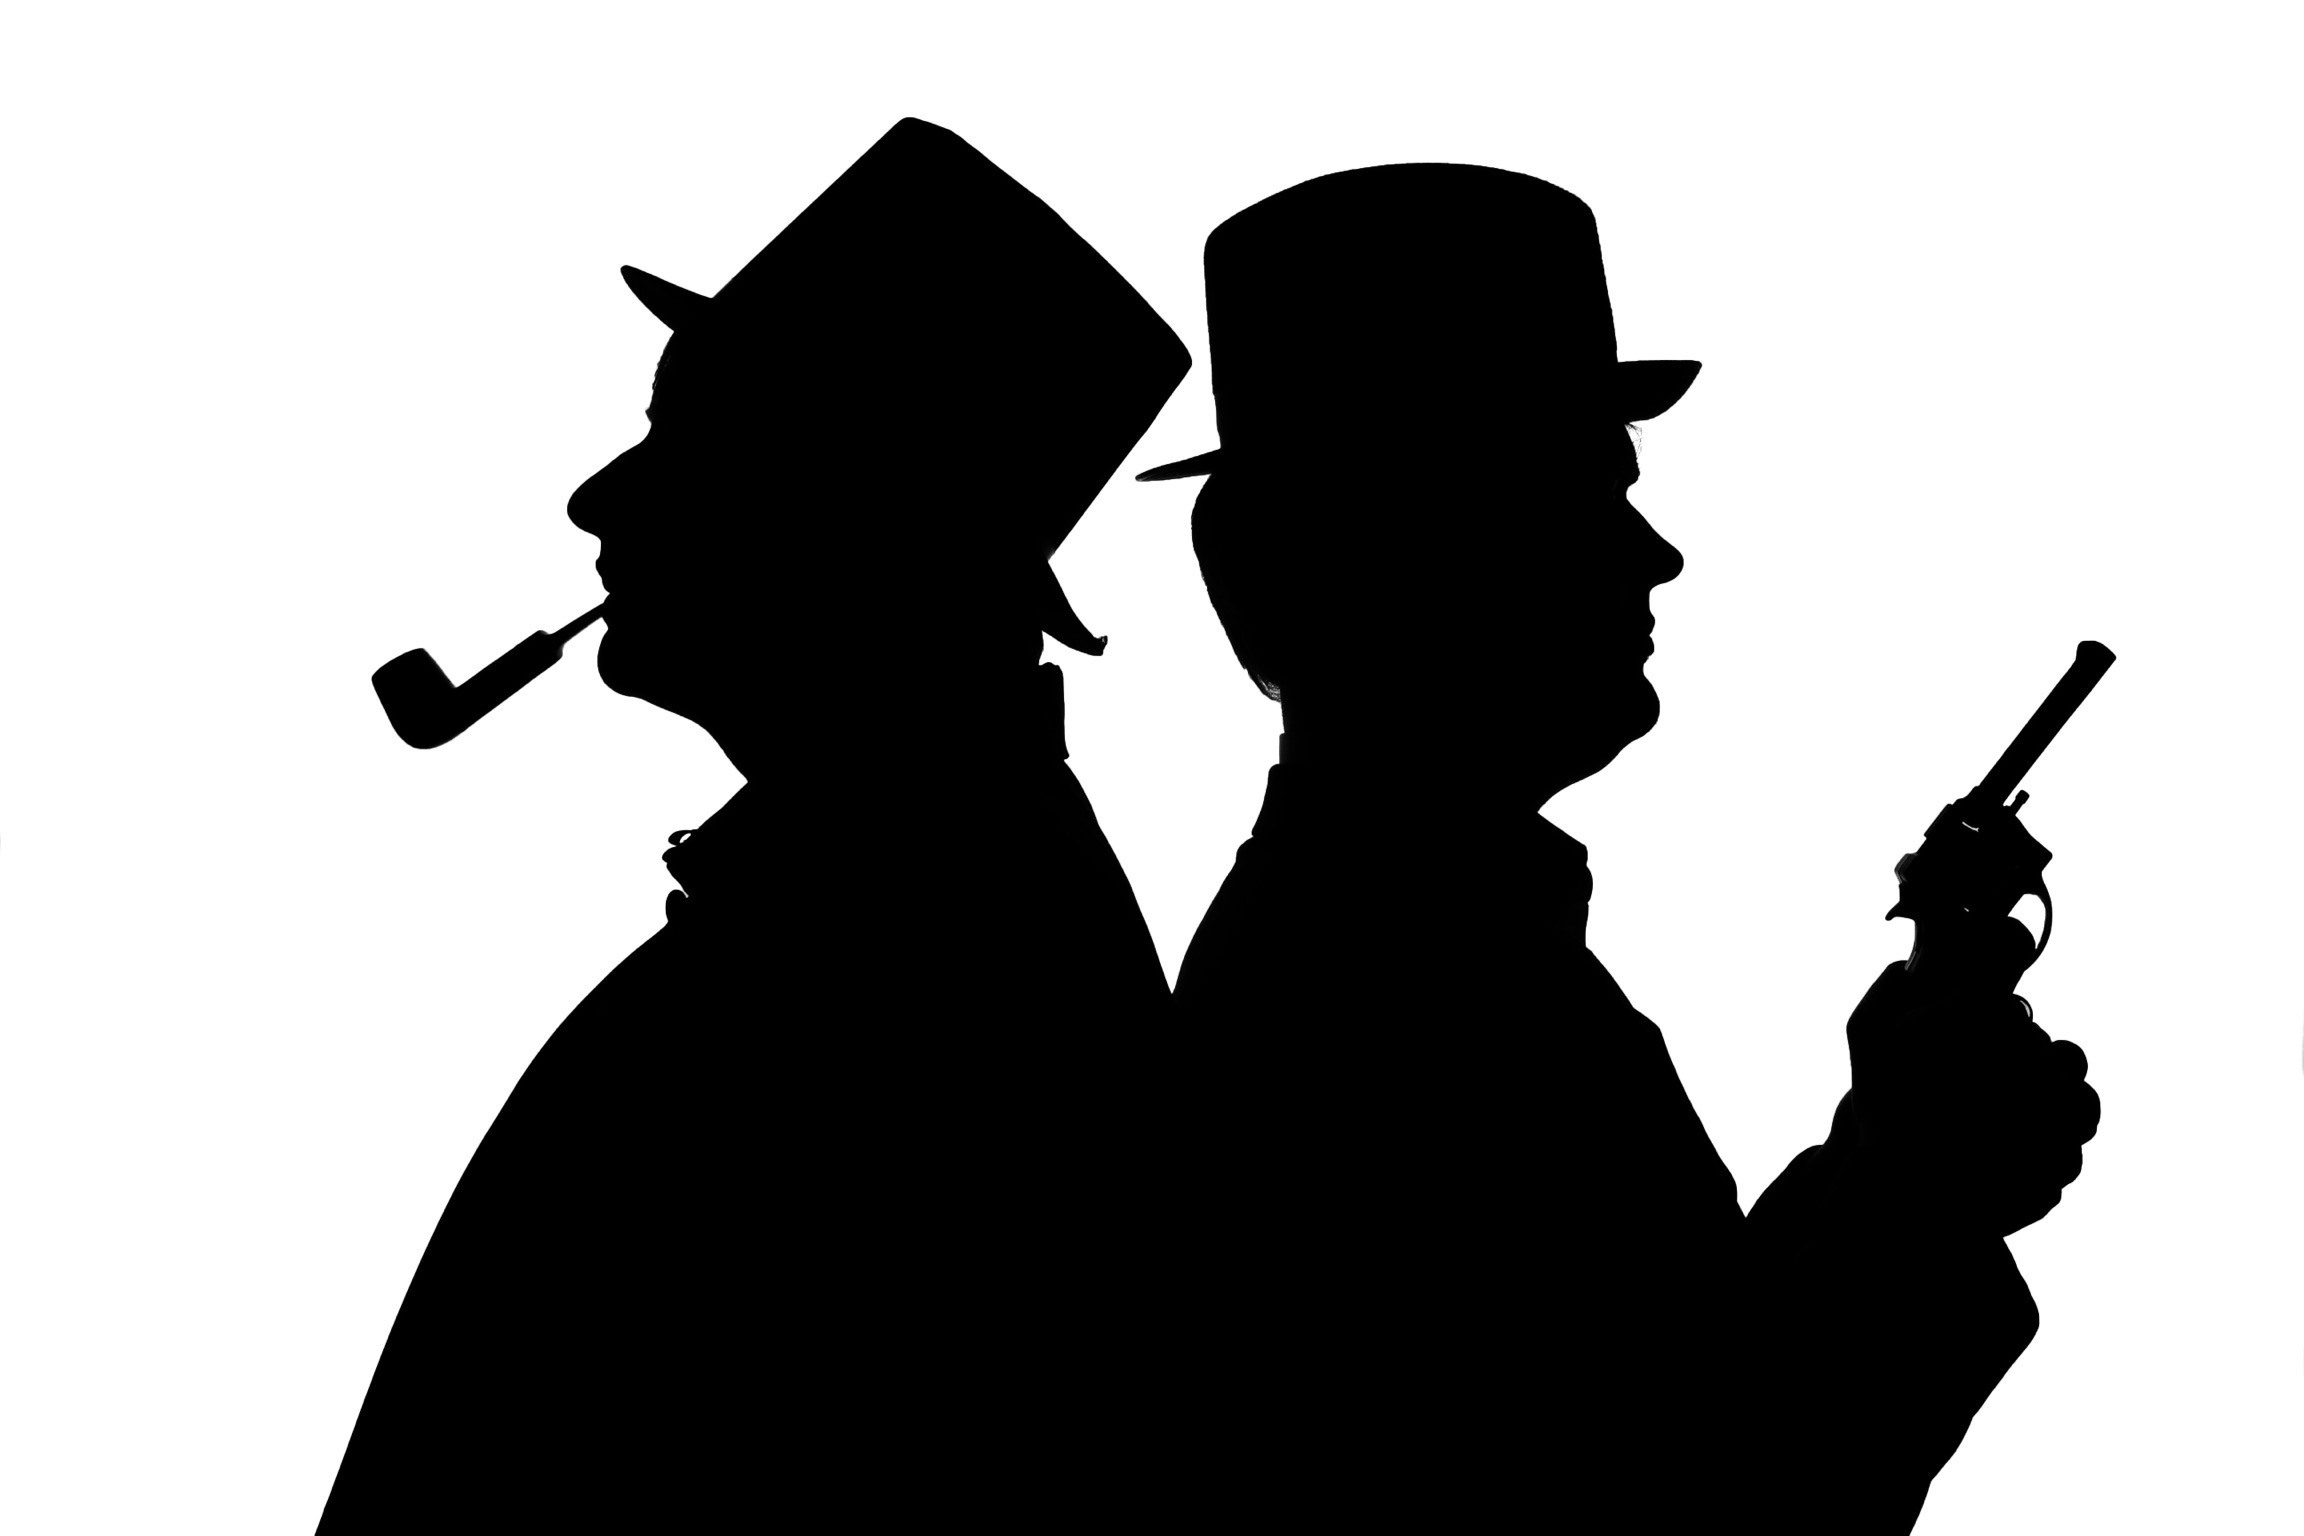

In [20]:
Image.open('/content/gdrive/MyDrive/Colab Notebooks/sherlock/sherlock-holmes-and-watson.jpg')

In [21]:
open("/content/gdrive/MyDrive/Colab Notebooks/sherlock/sherlock/fina.txt").readlines()[0:25]

['\n',
 '\n',
 '\n',
 '\n',
 '                                THE FINAL PROBLEM\n',
 '\n',
 '                               Arthur Conan Doyle\n',
 '\n',
 '\n',
 '\n',
 '     It is with a heavy heart that I take up my pen to write these the\n',
 '     last words in which I shall ever record the singular gifts by which\n',
 '     my friend Mr. Sherlock Holmes was distinguished.  In an incoherent\n',
 '     and, as I deeply feel, an entirely inadequate fashion, I have\n',
 '     endeavored to give some account of my strange experiences in his\n',
 '     company from the chance which first brought us together at the period\n',
 '     of the "Study in Scarlet," up to the time of his interference in the\n',
 '     matter of the "Naval Treaty"--an interference which had the\n',
 '     unquestionable effect of preventing a serious international\n',
 '     complication.  It was my intention to have stopped there, and to have\n',
 '     said nothing of that event which has created a void in my 

In [22]:
def masked_wordcloud(text, mask):
    wordcloud = WordCloud(background_color='white',
                        stopwords = STOPWORDS,
                        max_words = 15000,
                        max_font_size = 86, 
                        random_state = 42,
                        mask = mask)
    wordcloud.generate(text)
    figure_size=(24.0,16.0)
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
# Please pay attention to the STOPWORDS parameter that allows to exclude some common words like 'the', 'a', 'he' from the result, as they occur frequently in any kind of text and provide no useful information.

In [23]:
list(STOPWORDS)[:15]

['being',
 "why's",
 'should',
 'ever',
 'than',
 'his',
 'these',
 'to',
 "we'll",
 "hadn't",
 'doing',
 "won't",
 'no',
 'had',
 "they'll"]

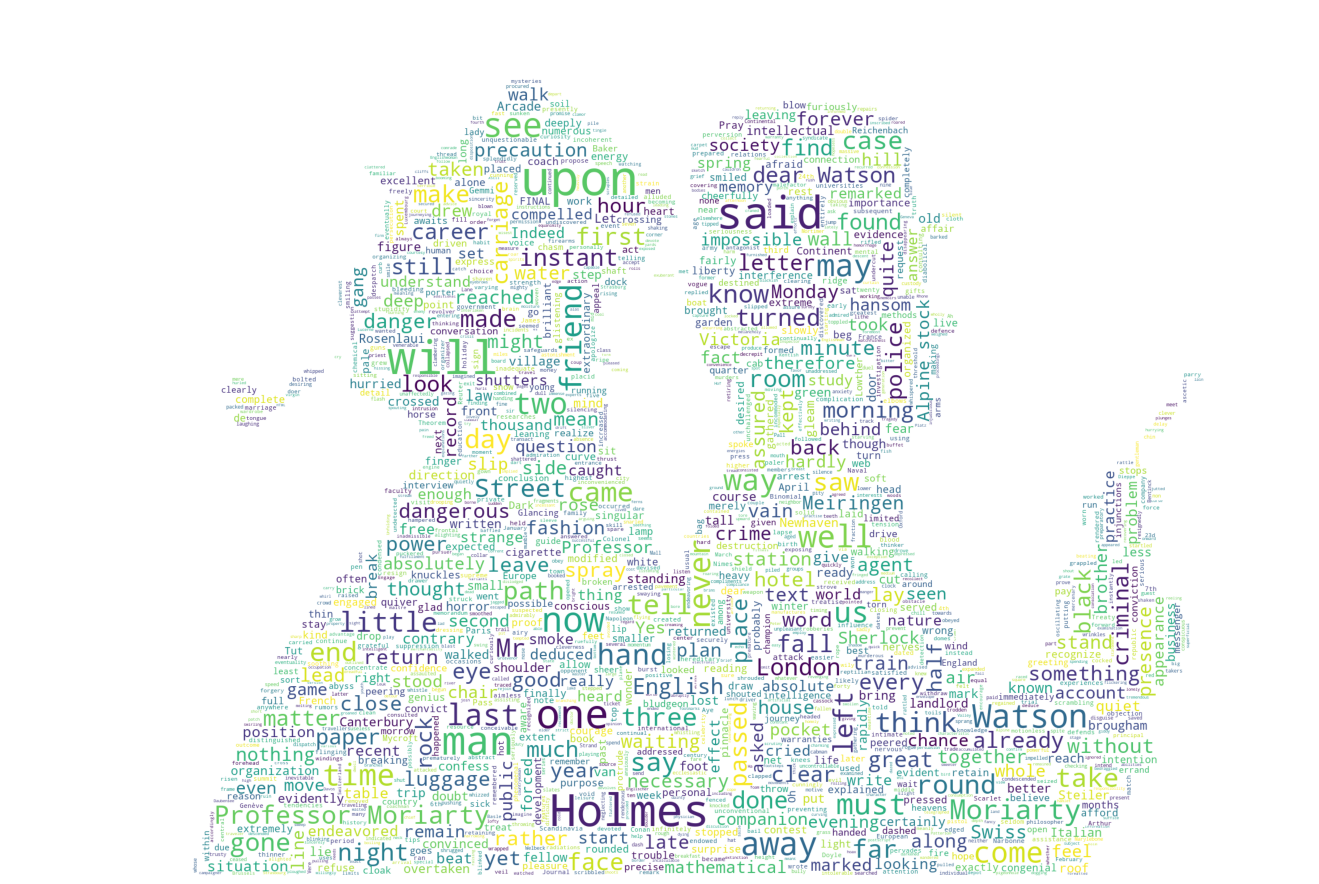

In [24]:
text=open("/content/gdrive/MyDrive/Colab Notebooks/sherlock/sherlock/fina.txt").read()
mask = np.array(Image.open('/content/gdrive/MyDrive/Colab Notebooks/sherlock/sherlock-holmes-and-watson.jpg'))
masked_wordcloud(text, mask)

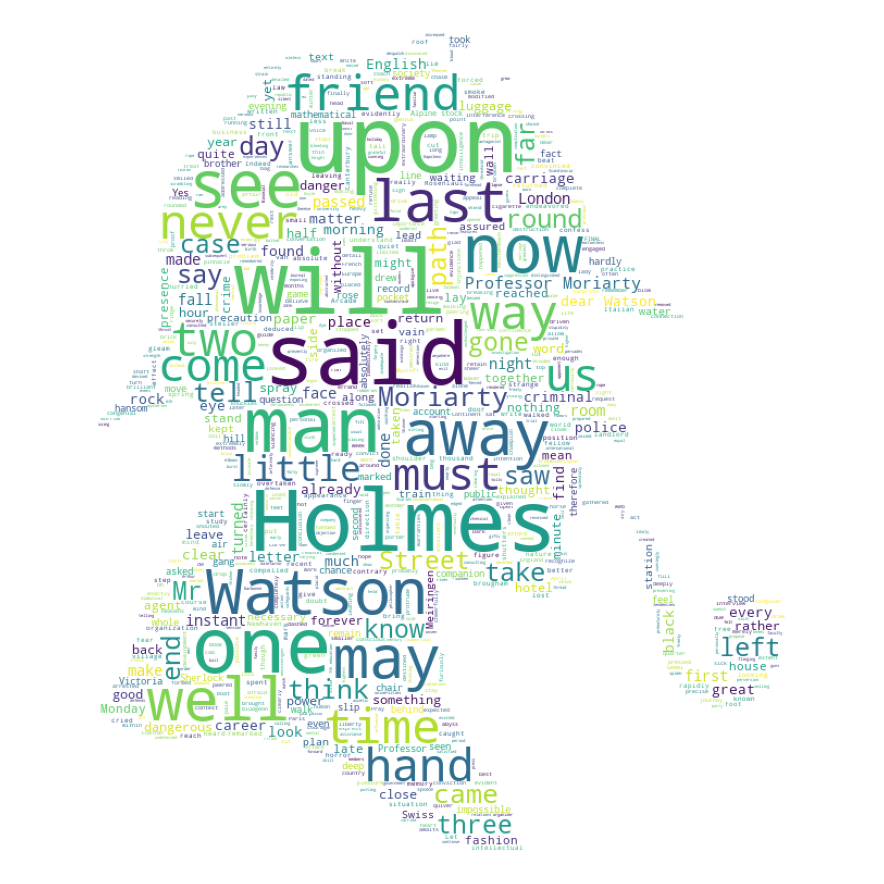

In [25]:
text=open("/content/gdrive/MyDrive/Colab Notebooks/sherlock/sherlock/fina.txt").read()
mask = np.array(Image.open('/content/gdrive/MyDrive/Colab Notebooks/sherlock/sherlock-holmes-head.jpg'))
masked_wordcloud(text, mask)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import optuna
from lightgbm import LGBMRegressor
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_parquet('/kaggle/input/march-lgbm-lags/all_rows.parquet')
ss = pd.read_csv('/kaggle/input/tabular-playground-series-mar-2022/sample_submission.csv')
TARGET = 'congestion'
hm = list(df.loc[df.test,'hm'].unique())

In [ ]:
for feat in ['xydir','xy','dhm','hm','direction', 'hm_xy','hm_xydir']:
    df[feat] = df[feat].astype('category')
bad_features = ['row_id','time',TARGET, 'test']
POSSIBLE_FEATURES = [feat for feat in df.columns if feat not in bad_features]
val_times = df[df.test].time.unique() - pd.Timedelta(days=7)
val = df[df.time.isin(val_times)].reset_index(drop=True).copy()
train = df[df.time<val_times[0]].reset_index(drop=True).copy()

In [ ]:
def objective(trial):
    ###################################
    # Generate our trial model.
    ###################################
    FEATURES = []
    for feat in POSSIBLE_FEATURES:
        select_feat = trial.suggest_categorical(feat, [True, False])
        if select_feat:
            FEATURES.append(feat)
    model = LGBMRegressor()
    
    #Masks for day and hours 
    only_test_day = trial.suggest_categorical('only_test_day',[True,False])
    if only_test_day:
        msk_day = train.time.dt.weekday.isin([0])
    else:
        msk_day = pd.Series([True for i in range(train.shape[0])])
        
    only_test_hours = trial.suggest_categorical('only_test_hours',[True,False])
    if only_test_hours:
        msk_hm = train.hm.isin(hm)
    else:
        msk_hm = pd.Series([True for i in range(train.shape[0])])
    model.fit(train.loc[msk_day & msk_hm, FEATURES], train.loc[msk_day & msk_hm, TARGET])
    
    
    #Val Score
    val_preds = model.predict(val[FEATURES])
    score = np.mean(np.abs(val[TARGET].values - val_preds))    
    return score

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=500)

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [30]:
train = df[df.test==False].reset_index(drop=True)
test = df[df.test].reset_index(drop=True)

#Getting the best features from model
FEATURES = []
for key, value in trial.params.items():
    if key not in  ['only_test_hours', 'only_test_day']:
        if value:
            FEATURES.append(key)

if trial.params['only_test_day']:
    msk_day = train.time.dt.weekday.isin([0])
else:
    msk_day = pd.Series([True for i in range(train.shape[0])])
if trial.params['only_test_hours']:
    msk_hm = train.hm.isin(hm)
else:
    msk_hm = pd.Series([True for i in range(train.shape[0])])

model = LGBMRegressor()
model.fit(train.loc[msk_day & msk_hm, FEATURES], train.loc[msk_day & msk_hm, TARGET])

ss[TARGET] = model.predict(test[FEATURES])

In [ ]:
ss.to_csv('sub.csv',index=False)